#### Lesson 7 Pandas .groupby(), Lambda Functions, & Pivot Tables ####
Link to this lesson: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/

In [2]:
# Import packages
import pandas as pd
import numpy as np
# show plots in the notebook
%matplotlib inline
# default notebook setup
pd.options.display.float_format = '{:3f}'.format # suppresses scientific notation in pandas

In [3]:
# Reads in the csv of flight data
data = pd.read_csv('us_flight_dataset_demo.csv')
data = data.fillna(np.nan) # replace missing values with NaN
data.info() # prints out column names, counts and dtypes in the dataframe
# the US flight data can now be called via the 'data' dataframe object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 14 columns):
flight_date            201664 non-null object
unique_carrier         201664 non-null object
flight_num             201664 non-null float64
origin                 201664 non-null object
dest                   201664 non-null object
arr_delay              196347 non-null float64
cancelled              201664 non-null float64
distance               201664 non-null float64
carrier_delay          58533 non-null float64
weather_delay          58533 non-null float64
late_aircraft_delay    58533 non-null float64
nas_delay              58533 non-null float64
security_delay         58533 non-null float64
actual_elapsed_time    196347 non-null float64
dtypes: float64(10), object(4)
memory usage: 21.5+ MB


In [4]:
data.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.000000,JFK,LAX,-19.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,381.000000
1,2015-01-03 00:00:00,AA,1.000000,JFK,LAX,-39.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,358.000000
2,2015-01-04 00:00:00,AA,1.000000,JFK,LAX,-12.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,385.000000
3,2015-01-05 00:00:00,AA,1.000000,JFK,LAX,-8.000000,0.000000,2475.000000,nan,nan,nan,nan,nan,389.000000
4,2015-01-06 00:00:00,AA,1.000000,JFK,LAX,25.000000,0.000000,2475.000000,0.000000,0.000000,0.000000,25.000000,0.000000,424.000000


In [5]:
data.sample(n=5)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
177625,2015-01-14 00:00:00,EV,5413.000000,DTW,MDW,13.000000,0.000000,228.000000,nan,nan,nan,nan,nan,92.000000
6673,2015-01-05 00:00:00,AA,1214.000000,AUS,ORD,-3.000000,0.000000,978.000000,nan,nan,nan,nan,nan,156.000000
136429,2015-01-11 00:00:00,UA,1155.000000,LAS,ORD,15.000000,0.000000,1514.000000,0.000000,0.000000,0.000000,15.000000,0.000000,221.000000
164636,2015-01-03 00:00:00,EV,4152.000000,BWI,ORD,5.000000,0.000000,622.000000,nan,nan,nan,nan,nan,137.000000
119053,2015-01-12 00:00:00,OO,5392.000000,SFO,OTH,56.000000,0.000000,412.000000,51.000000,0.000000,0.000000,5.000000,0.000000,99.000000


In [6]:
data.sort_values(by='arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,2015-01-11 00:00:00,AA,1595.000000,AUS,DFW,1444.000000,0.000000,190.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,59.000000
10214,2015-01-13 00:00:00,AA,1487.000000,OMA,DFW,1392.000000,0.000000,583.000000,1392.000000,0.000000,0.000000,0.000000,0.000000,117.000000
12430,2015-01-03 00:00:00,AA,1677.000000,MEM,DFW,1384.000000,0.000000,432.000000,1380.000000,0.000000,0.000000,4.000000,0.000000,104.000000
8443,2015-01-04 00:00:00,AA,1279.000000,OMA,DFW,1237.000000,0.000000,583.000000,1222.000000,0.000000,15.000000,0.000000,0.000000,102.000000
10328,2015-01-05 00:00:00,AA,1495.000000,EGE,DFW,1187.000000,0.000000,721.000000,1019.000000,0.000000,168.000000,0.000000,0.000000,127.000000
36570,2015-01-04 00:00:00,DL,1435.000000,MIA,MSP,1174.000000,0.000000,1501.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,231.000000
36495,2015-01-04 00:00:00,DL,1367.000000,ROC,ATL,1138.000000,0.000000,749.000000,1112.000000,0.000000,0.000000,26.000000,0.000000,171.000000
59072,2015-01-14 00:00:00,DL,1687.000000,SAN,MSP,1084.000000,0.000000,1532.000000,1070.000000,0.000000,0.000000,14.000000,0.000000,240.000000
32173,2015-01-05 00:00:00,AA,970.000000,LAS,LAX,1042.000000,0.000000,236.000000,1033.000000,0.000000,9.000000,0.000000,0.000000,66.000000
56488,2015-01-12 00:00:00,DL,2117.000000,ATL,COS,1016.000000,0.000000,1184.000000,1016.000000,0.000000,0.000000,0.000000,0.000000,193.000000


In [7]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)

In [8]:
data[['delayed', 'arr_delay']][10:20] # Quick check of the function

,delayed,arr_delay
10,False,-5.000000
11,False,-40.000000
12,False,-69.000000
13,False,-8.000000
14,True,24.000000
15,True,150.000000
16,False,-15.000000
17,False,-18.000000
18,False,-19.000000
19,False,-20.000000


In [9]:
data['delayed'].value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

In [10]:
not_delayed = data['delayed'].value_counts()[0] # first value of the result  above
delayed = data['delayed'].value_counts()[1] # second value of the results above
total_flights = not_delayed + delayed # total cunt of flights
print float(delayed) / total_flights # converting to float to get a float results

0.48906597112


In [11]:
4/3

1

In [12]:
float(4)/3

1.3333333333333333

In [13]:
data['cancelled'].value_counts() # count the 0s and 1s values

0.000000    196873
1.000000      4791
Name: cancelled, dtype: int64

In [13]:
not_delayed, delayed = data['cancelled'].value_counts()
print delayed / (delayed + not_delayed), '<- without conversion'
print float(delayed) / (delayed + not_delayed), '<- _with_ conversion!'

0 <- without conversion
0.02375733894 <- _with_ conversion!


In [14]:
4.0/3

1.3333333333333333

In [15]:
group_by_carrier = data.groupby(['unique_carrier','delayed'])

In [16]:
group_by_carrier

In [17]:
group_by_carrier.size()

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

In [18]:
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


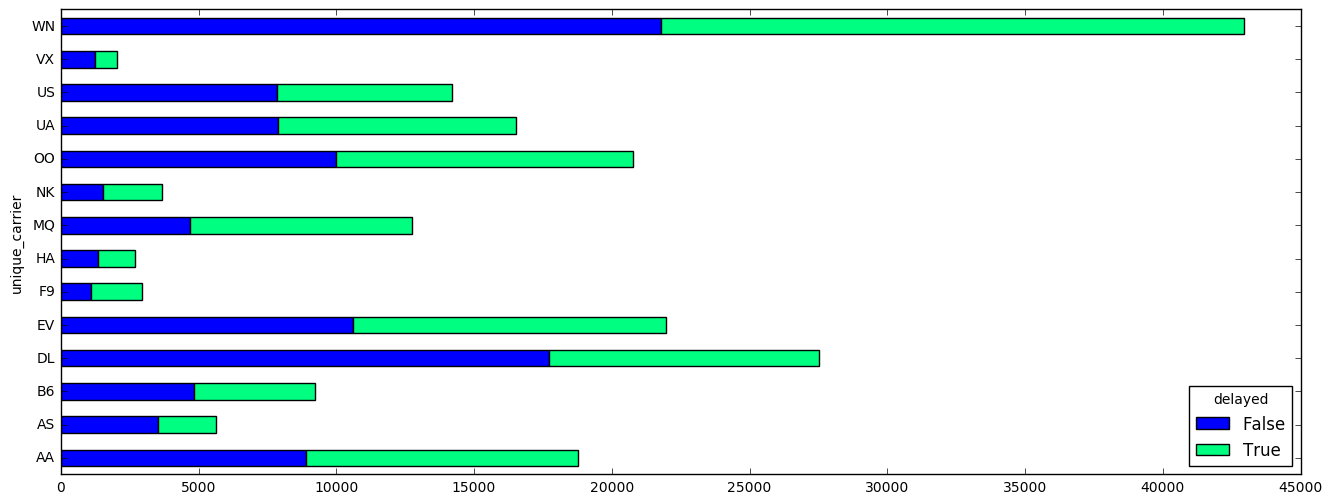

In [19]:
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter');

In [20]:
data['delayed_20'] = data['arr_delay'].apply(lambda x: x > 20)
delay_counts =data['delayed_20'].value_counts()
delay_counts

False    152985
True      48679
Name: delayed_20, dtype: int64

In [21]:
data['arr_delay'].apply(lambda x: x > 20).value_counts()[1] # one-liner

48679

In [1]:
print 'Flights delayed longer than 20 min:', delay_counts[1]/float(delay_counts[1] + delay_counts[0]) * 100, '%'

Flights delayed longer than 20 min:

NameError: name 'delay_counts' is not defined

In [23]:
flights_by_carrier = data.pivot_table(index='flight_date', # 'rows' in excel
                                      columns='unique_carrier', # columns
                                      values='flight_num', # the name of the column of values to be aggregated in the ultimate table
                                      aggfunc='count' # (Aggregation Function) how rows are summarized, such as sum, mean, or count
                                     )
flights_by_carrier

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
2015-01-03 00:00:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
2015-01-04 00:00:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
2015-01-05 00:00:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
2015-01-06 00:00:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396
2015-01-07 00:00:00,1420,419,694,2107,1705,228,208,998,284,1557,1259,1143,151,3398
2015-01-08 00:00:00,1447,444,731,2214,1759,224,208,1009,284,1625,1331,1171,164,3398
2015-01-09 00:00:00,1448,447,730,2204,1767,229,222,1010,289,1631,1331,1169,167,3364
2015-01-10 00:00:00,1285,412,641,1584,1133,168,201,768,285,1270,908,912,109,2668


In [24]:
data.pivot_table(columns='flight_date')

flight_date,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,2015-01-11 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00
actual_elapsed_time,141.688442,145.950033,145.111664,140.607814,137.699987,136.297427,138.249851,137.045859,137.876833,138.712463,139.096045,134.649796,133.110117
arr_delay,9.838904,25.461860,31.975011,18.811310,21.299274,11.955429,13.316482,12.255611,1.922475,10.187042,18.563998,3.162599,-0.817102
cancelled,0.015352,0.021446,0.026480,0.026287,0.025792,0.019459,0.050784,0.029298,0.015392,0.023993,0.027442,0.012978,0.011469
carrier_delay,16.668783,18.023806,18.213584,17.986333,16.751224,15.317566,19.767890,18.768564,25.002997,17.142741,15.063235,18.112939,22.049189
delayed,0.500209,0.648050,0.679244,0.548707,0.544695,0.483912,0.419639,0.468328,0.345917,0.436424,0.551360,0.382279,0.302835
delayed_20,0.216116,0.375988,0.417564,0.284143,0.311851,0.230749,0.197889,0.220515,0.127592,0.204487,0.285436,0.138274,0.092461
distance,839.785915,848.749320,838.077666,820.224801,784.111329,785.939182,792.963770,793.554910,830.779650,809.407279,791.471614,779.262121,782.294072
flight_num,2284.698047,2287.225541,2268.050514,2233.375030,2238.016324,2237.701561,2238.148479,2237.685657,2484.358312,2271.538701,2246.031407,2249.280171,2241.273711
late_aircraft_delay,21.317207,26.525643,31.864547,26.294995,28.462557,22.112744,26.855823,26.280862,17.287712,26.642197,25.970956,19.288743,18.260073
nas_delay,9.005254,13.782660,15.452955,14.294107,17.223935,14.835132,18.485873,11.877020,6.972028,12.194943,16.471140,11.319079,9.395081


In [25]:
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
flight_delays_by_day = data.pivot_table(index='flight_date', values=delays_list, aggfunc='sum')
flight_delays_by_day

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02 00:00:00,76143.000000,97377.000000,41136.000000,258.000000,7357.000000
2015-01-03 00:00:00,122652.000000,180507.000000,93791.000000,950.000000,14252.000000
2015-01-04 00:00:00,142667.000000,249595.000000,121043.000000,380.000000,16784.000000
2015-01-05 00:00:00,101335.000000,148146.000000,80533.000000,197.000000,20438.000000
2015-01-06 00:00:00,92383.000000,156971.000000,94990.000000,372.000000,26299.000000
2015-01-07 00:00:00,66708.000000,96301.000000,64607.000000,165.000000,17763.000000
2015-01-08 00:00:00,74861.000000,101703.000000,70006.000000,510.000000,33015.000000
2015-01-09 00:00:00,80123.000000,112193.000000,50703.000000,182.000000,15076.000000
2015-01-10 00:00:00,50056.000000,34610.000000,13958.000000,116.000000,5683.000000


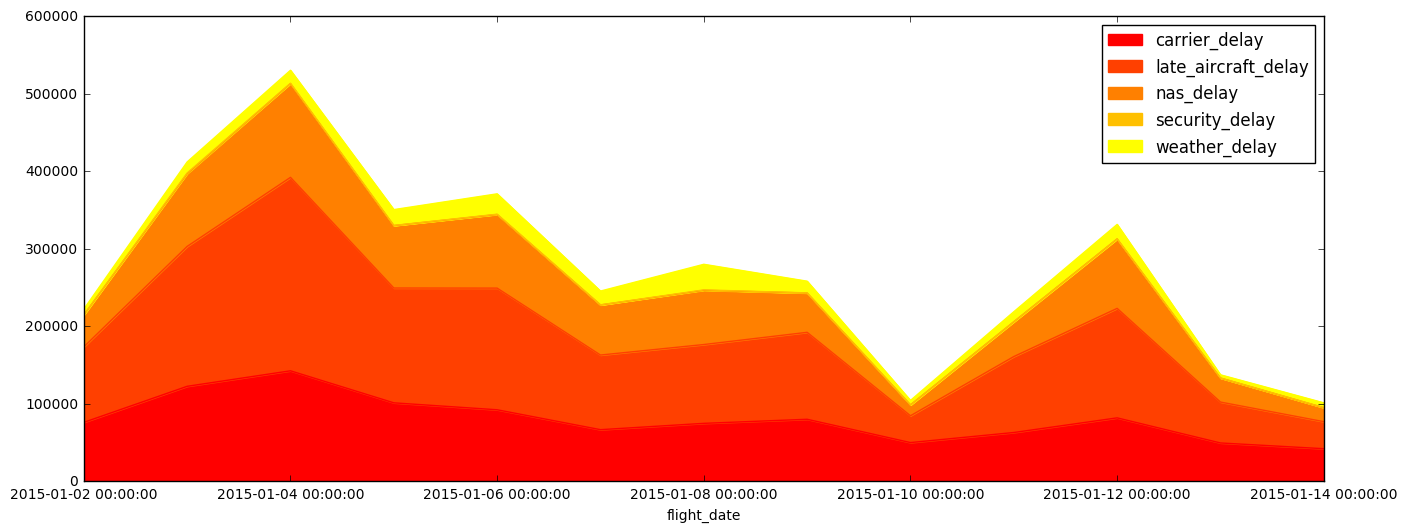

In [26]:
flight_delays_by_day.plot(kind='area',stacked=True, colormap='autumn',figsize=[16,6]);

In [27]:
flights_by_carrier = data.pivot_table(index='flight_date', # 'rows' in excel
                                      columns='unique_carrier', # columns
                                      values='flight_num', # the name of the column of values to be aggregated in the ultimate table
                                      aggfunc='count' # (Aggregation Function) how rows are summarized, such as sum, mean, or count
                                     )
flights_by_carrier

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
2015-01-03 00:00:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
2015-01-04 00:00:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
2015-01-05 00:00:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
2015-01-06 00:00:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396
2015-01-07 00:00:00,1420,419,694,2107,1705,228,208,998,284,1557,1259,1143,151,3398
2015-01-08 00:00:00,1447,444,731,2214,1759,224,208,1009,284,1625,1331,1171,164,3398
2015-01-09 00:00:00,1448,447,730,2204,1767,229,222,1010,289,1631,1331,1169,167,3364
2015-01-10 00:00:00,1285,412,641,1584,1133,168,201,768,285,1270,908,912,109,2668


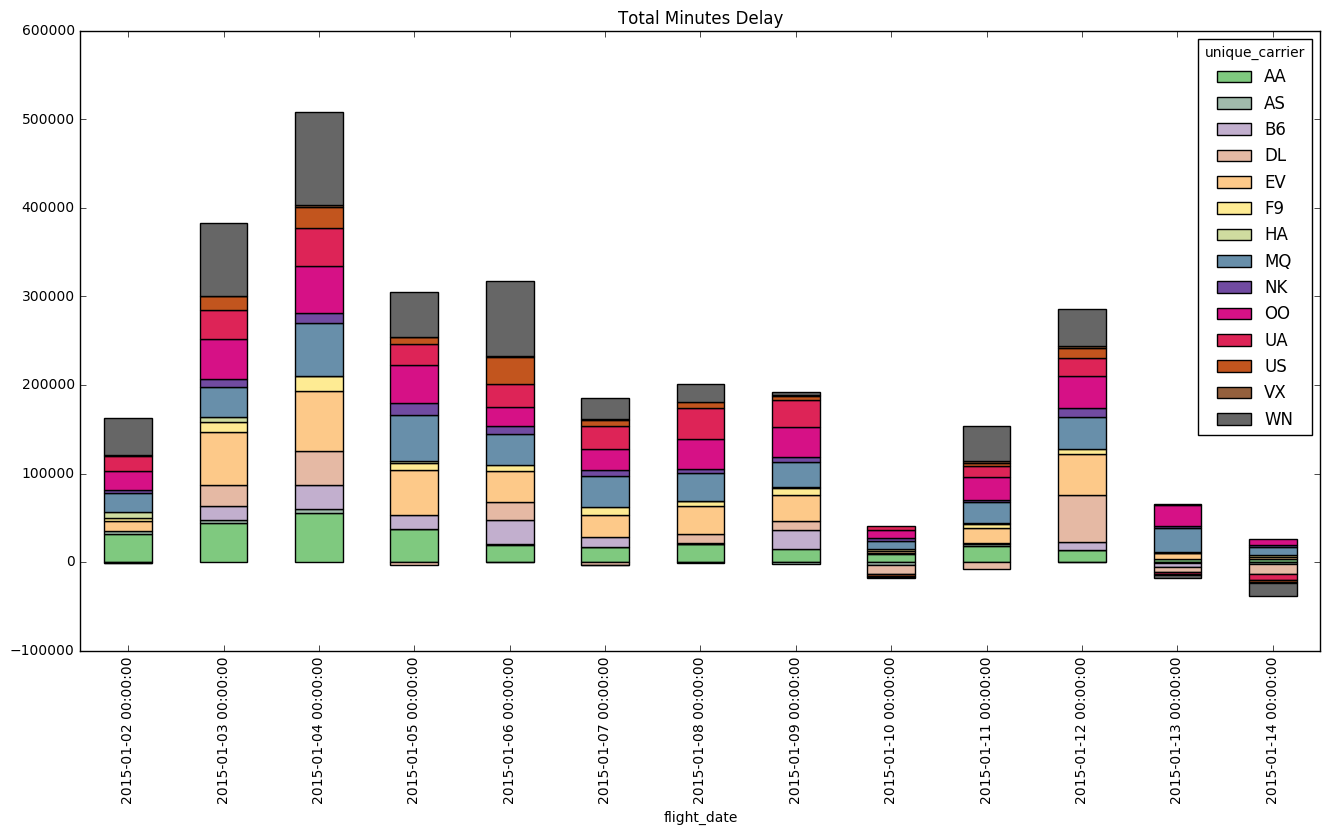

In [28]:
tot_delayed = data.pivot_table(index='flight_date', columns='unique_carrier', values='arr_delay', aggfunc='sum' )
tot_delayed.plot(kind='bar', stacked=True, figsize=[16,8], colormap='Accent', title='Total Minutes Delay');